In [18]:
import math
import matplotlib.pyplot as plt
import numpy as np 

Classified
('predicted', 1, 'TestClass', 1, 'Data point', [15, 10, 1])
Classified
('predicted', 1, 'TestClass', 1, 'Data point', [13, 6, 1])
Classified
('predicted', 1, 'TestClass', 1, 'Data point', [14, 8, 1])
Classified
('predicted', 1, 'TestClass', 1, 'Data point', [12, 9, 1])
Classified
('predicted', 1, 'TestClass', 1, 'Data point', [10, 7, 1])
Classified
('predicted', 1, 'TestClass', 1, 'Data point', [12, 6, 1])
Classified
('predicted', 1, 'TestClass', 1, 'Data point', [11, 8, 1])
Classified
('predicted', 1, 'TestClass', 1, 'Data point', [13, 10, 1])
Classified
('predicted', 1, 'TestClass', 1, 'Data point', [10, 6, 1])
Classified
('predicted', 0, 'TestClass', 0, 'Data point', [8, 12, 1])
Classified
('predicted', 0, 'TestClass', 0, 'Data point', [6, 11, 1])
Classified
('predicted', 0, 'TestClass', 0, 'Data point', [8, 14, 1])
Classified
('predicted', 0, 'TestClass', 0, 'Data point', [9, 14, 1])
Classified
('predicted', 0, 'TestClass', 0, 'Data point', [10, 15, 1])
Classified
('pred

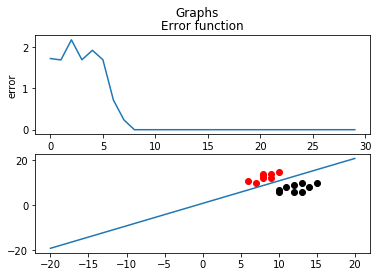

In [29]:
# q represents the number of iteratons and p represents the test case that has been considered
# data is linearly seperable yay!

def sigmoid(x):
  return 1 / (1 + math.exp(-x))



def main():
    fig, axs = plt.subplots(2)
    fig.suptitle("Graphs")
    class1 = [[15,10,1],[13,6,1],[14,8,1],[12,9,1],[10,7,1],[12,6,1],[11,8,1],[13,10,1],[10,6,1]]
    class2 = [[8,12,1],[6,11,1],[8,14,1],[9,14,1],[10,15,1],[9,12,1],[7,10,1],[8,13,1]]
    tempx = []
    tempy=[]
    tempx2 = []
    tempy2=[]

    for i in range(0,len(class1)):# for drawing the points
        tempx.append( class1[i][0])
        tempy.append( class1[i][1])
    for i in range(0,len(class2)):
        tempx2.append( class2[i][0])
        tempy2.append( class2[i][1])
    #axs[0].scatter(tempx,tempy)
    axs[1].plot(tempx, tempy, 'o', color='black')
    axs[1].plot(tempx2, tempy2, 'o', color='red')

    #params = [0.001,0.001,0.001]
    #errorArr=[]
    #iteration=[]
    testPoint=[]
    testClass= 0
    eta = 0.0001
    paramsGlob = []
    
    for p in range(0,len(class1)+len(class2)): #ignore p
    #for p in range(0,len(class1) + len(class2)):
        #delE = [0,0,0]
        params = [0.001,0.001,0.001]
        errorArr=[]
        iteration=[]
        classes = []
        #error=0.0
        #params = [0.1,0.1,0.1]
        #OdArr = []
        testClass = None
        if p >= len(class1):
            testClass = 0
        else:
            testClass = 1
        train = []
        test = []
        
        if testClass == 1:
            test.append(class1[p])
            for j in range(0,len(class1)):
                if j!=p:
                    train.append(class1[j])
                    classes.append(0.9)
            for j in range(0,len(class2)):
                train.append(class2[j])
                classes.append(0.1)
        else:
            test.append(class2[p-len(class1)])
            for j in range(0,len(class1)):
                train.append(class1[j])
                classes.append(0.9)
            for j in range(0,len(class2)):
                if j!= p - len(class1):
                    train.append(class2[j])
                    classes.append(0.1)
            
       # print(test)
       # print(train)
        #print(classes)

        for q in range(0,30):
            error=0.0
            OdArr = []
            delE = [0,0,0]
            for i in range(0,len(train)):
                y = params[0]*train[i][0] + params[1]*train[i][1] + params[2]*train[i][2]
                #Od = round(sigmoid(y),2)
                Od = sigmoid(y)
                OdArr.append(Od)
                if classes[i] == 0.9:
                    if Od < 0.5:
                        for j in range(0,len(delE)):
                            delE[j]+= (classes[i] - Od) * Od * (1-Od) * train[i][j]
                            error+= (1.0/2) * ((0.9 - Od)**2)
                            
                else:
                    if(Od>0.5):
                        for j in range(0,len(delE)):
                            delE[j]+= (classes[i] - Od) * Od * (1-Od) * train[i][j]
                            error+= (1.0/2)* ((0.1 - Od)**2)
                            

            for j in range(0,len(delE)):
                #delE[j] = - round(delE[j],2)
                delE[j] =  delE[j]
            """print(delE)
            print(len(delE))
            print("od values for all train data")
            print(OdArr)"""
            #print("Initial params",params)
            for j in range(0,len(params)):
                params[j]+= eta*delE[j]
            paramsGlob = params
           # print(" new params  ",params)

            errorArr.append(error)
            #iteration.append(p)
            iteration.append(q)


            """predict = test[0][0] * params[0] + test[0][1]*params[1] + test[0][2]*params[2]
            predict = sigmoid(predict)
            print("Prediction value",predict)
            if predict>0.5:
                print("Predicted =",1)
                print("Original =,",testClass)
            else:
                print("Predicted =",0)
                print("Original =,",testClass)"""

            #print('\n')
        
        predict = params[0]*test[0][0] + params[1]*test[0][1] + params[2]*test[0][2]
        predict = sigmoid(predict)
        predictClass=None
        if(predict >0.5):
            predictClass = 1
        else:
            predictClass = 0
        if(predictClass==testClass):
            print("Classified")
            print("predicted",predictClass, "TestClass",testClass,"Data point",test[0])
        else:
             print("Miscalssified")
             print("predicted",predictClass, "TestClass",testClass)




    #print(errorArr)
    #print(iteration)
    axs[0].plot(iteration,errorArr)
    x = np.linspace(-20, 20, 100) 
    y = - (paramsGlob[0]*x + paramsGlob[2])/ paramsGlob[1]
    axs[1].plot(x,y)
    axs[0].set_title("Error function")

    axs[0].set(xlabel='iterations', ylabel='error')
    
    

main()